In [17]:
# === Team Information (Mandatory) ===
# Fill in the fields below.

GITHUB_REPO = ""       #https://github.com/msardamasri/h1-miba.git

TEAM_MEMBERS = [
    #Marc Sardà
    #Sara Fibla
    #Borisa Alargic
    #Jad Zoghaib
    #Samreen Siddique
]

GITHUB_REPO, TEAM_MEMBERS


('', [])

In [18]:
# ======================================================
# 1. IMPORTS
# ======================================================
# These are the required libraries for data processing, visualization,
# and machine learning preprocessing.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

import re
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

import geopandas as gpd
from math import radians, sin, cos, asin, sqrt
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Downloading NLTK resources...")
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt_tab', quiet=True)


True

### LOAD & MERGE DATASETS

In [19]:
print("Sampling & merging datasets...")

df3 = pd.read_csv("calendar.csv.gz").sample(frac=0.1, random_state=42)
df2 = pd.read_csv("reviews.csv.gz").sample(frac=0.1, random_state=42)
df1 = pd.read_csv("listings.csv.gz").sample(frac=0.1, random_state=42)

df5 = pd.merge(df3, df1, how="inner", left_on="listing_id", right_on="id")
df = pd.merge(df5, df2, how="inner", on="listing_id")

print("Merged dataframe shape:", df.shape)

calendar = pd.read_csv("calendar.csv.gz").sample(frac=0.1, random_state=42)
listings = pd.read_csv("listings.csv.gz").sample(frac=0.1, random_state=42)
reviews = pd.read_csv("reviews.csv.gz").sample(frac=0.1, random_state=42)


Sampling & merging datasets...
Merged dataframe shape: (162541, 91)


In [20]:
print(calendar.head())
print("\n")
print("-----------------------------------------")
print("\n")
print(listings.head())
print("\n")
print("-----------------------------------------")
print("\n")
print(reviews.head())
print("\n")
print("-----------------------------------------")

                  listing_id        date available  price  adjusted_price  \
1564889  1252846196342561863  2026-02-05         f    NaN             NaN   
2494049             22046427  2025-09-28         f    NaN             NaN   
2557396             27109062  2026-04-18         t    NaN             NaN   
2816625   669277618288120624  2026-07-05         f    NaN             NaN   
1200010  1130959676966202372  2026-06-06         t    NaN             NaN   

         minimum_nights  maximum_nights  
1564889              14             365  
2494049               2            1125  
2557396              30            1125  
2816625              14            1125  
1200010               3             365  


-----------------------------------------


                       id                                       listing_url  \
7641  1477722919173634412  https://www.airbnb.com/rooms/1477722919173634412   
2166             54376457             https://www.airbnb.com/rooms/54376457   
34

saraboris

In [21]:
def get_feature_types(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    return numeric_cols, categorical_cols

In [22]:
# Join the calender, listings and reviews dataframes into a single dataframe using the id as my key.
df = pd.merge(calendar, listings, left_on='listing_id', right_on='id', how='inner')
df = pd.merge(df, reviews, left_on='listing_id', right_on='listing_id', how='inner')
df.shape


(162541, 91)

In [23]:
df.head()

,listing_id,date_x,available,price_x,adjusted_price,minimum_nights_x,maximum_nights_x,id_x,listing_url,scrape_id,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,id_y,date_y,reviewer_id,reviewer_name,comments
0,562191517654979125,2026-08-21,t,NaN,NaN,4,1125,562191517654979125,https://www.airbnb.com/rooms/562191517654979125,20250923203019,...,3,3,0,0,0.61,1448484241119290469,2025-06-21,203208628,Harry,"Would recommend, great location at a fair pric..."
1,562191517654979125,2026-08-21,t,NaN,NaN,4,1125,562191517654979125,https://www.airbnb.com/rooms/562191517654979125,20250923203019,...,3,3,0,0,0.61,586714725395692971,2022-03-20,445197101,Monica,"Piso centrico, buena ubicacion y muy bien equi..."
2,562191517654979125,2026-08-21,t,NaN,NaN,4,1125,562191517654979125,https://www.airbnb.com/rooms/562191517654979125,20250923203019,...,3,3,0,0,0.61,1431802704596061957,2025-05-29,43058925,Michela,L'alloggio di Fernando é perfetta per spostars...
3,16084515,2026-06-05,f,NaN,NaN,7,999,16084515,https://www.airbnb.com/rooms/16084515,20250923203019,...,7,7,0,0,0.37,970873967509206589,2023-09-01,1490963,Sarah,Nous avions réservé cet appartement pour mes p...
4,16084515,2026-06-05,f,NaN,NaN,7,999,16084515,https://www.airbnb.com/rooms/16084515,20250923203019,...,7,7,0,0,0.37,1499961842389104966,2025-08-31,360880032,Lynn,Our stay was lovely thanks to Olga’s great apa...


In [24]:
df.tail()

,listing_id,date_x,available,price_x,adjusted_price,minimum_nights_x,maximum_nights_x,id_x,listing_url,scrape_id,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,id_y,date_y,reviewer_id,reviewer_name,comments
162536,53132617,2026-09-02,t,NaN,NaN,10,365,53132617,https://www.airbnb.com/rooms/53132617,20250923203019,...,4,4,0,0,1.31,1059988871638368759,2024-01-02,140294244,Andrew,This is a lovely Air B&B and exactly as listed...
162537,53132617,2026-09-02,t,NaN,NaN,10,365,53132617,https://www.airbnb.com/rooms/53132617,20250923203019,...,4,4,0,0,1.31,1015789681827259986,2023-11-02,59350877,Hubert,Great location near to beach and some nice res...
162538,53132617,2026-09-02,t,NaN,NaN,10,365,53132617,https://www.airbnb.com/rooms/53132617,20250923203019,...,4,4,0,0,1.31,994107387066615112,2023-10-03,12655344,Ramiro,Jorge was super friendly from the booking fay ...
162539,53132617,2026-09-02,t,NaN,NaN,10,365,53132617,https://www.airbnb.com/rooms/53132617,20250923203019,...,4,4,0,0,1.31,1020189264295941518,2023-11-08,166756668,Claus,Super experience. The apartment fully met our ...
162540,53132617,2026-09-02,t,NaN,NaN,10,365,53132617,https://www.airbnb.com/rooms/53132617,20250923203019,...,4,4,0,0,1.31,1233916661666923279,2024-08-29,58335416,Myriam,"Jorge ist ein wunderbarer Gastgeber, der sich ..."


In [25]:
print(f"There are {df.shape[0]} rows, and {df.shape[1]} columns.")

There are 162541 rows, and 91 columns.


In [26]:
df.duplicated().any()

np.False_

In [27]:
def df_quick_info(df):
    return (pd.DataFrame({
        'data_type': df.dtypes, 'num_unique': df.nunique(), 'has_na': df.isna().any(), 'na_count': df.isna().sum()}))

df_quick_info(df)

,data_type,num_unique,has_na,na_count
listing_id,int64,503,False,0
date_x,object,366,False,0
available,object,2,False,0
price_x,float64,0,True,162541
adjusted_price,float64,0,True,162541
...,...,...,...,...
id_y,int64,4416,False,0
date_y,object,2105,False,0
reviewer_id,int64,4403,False,0
reviewer_name,object,2419,False,0


In [28]:
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,162541.0,3.122961e+17,4.768329e+17,3.466950e+05,1.490921e+07,2.518547e+07,7.346942e+17,1.487794e+18
price_x,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adjusted_price,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minimum_nights_x,162541.0,4.569758e+00,6.473790e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.000000e+02
maximum_nights_x,162541.0,6.686266e+02,4.928324e+02,1.000000e+00,9.000000e+01,1.124000e+03,1.125000e+03,1.125000e+03
id_x,162541.0,3.122961e+17,4.768329e+17,3.466950e+05,1.490921e+07,2.518547e+07,7.346942e+17,1.487794e+18
scrape_id,162541.0,2.025092e+13,0.000000e+00,2.025092e+13,2.025092e+13,2.025092e+13,2.025092e+13,2.025092e+13
host_id,162541.0,1.657668e+08,1.809008e+08,8.794400e+04,2.777396e+07,1.011111e+08,2.087041e+08,7.046350e+08
host_listings_count,162541.0,9.368153e+00,2.056079e+01,1.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,1.200000e+02
host_total_listings_count,162541.0,1.163477e+01,2.557627e+01,1.000000e+00,2.000000e+00,4.000000e+00,7.000000e+00,1.810000e+02


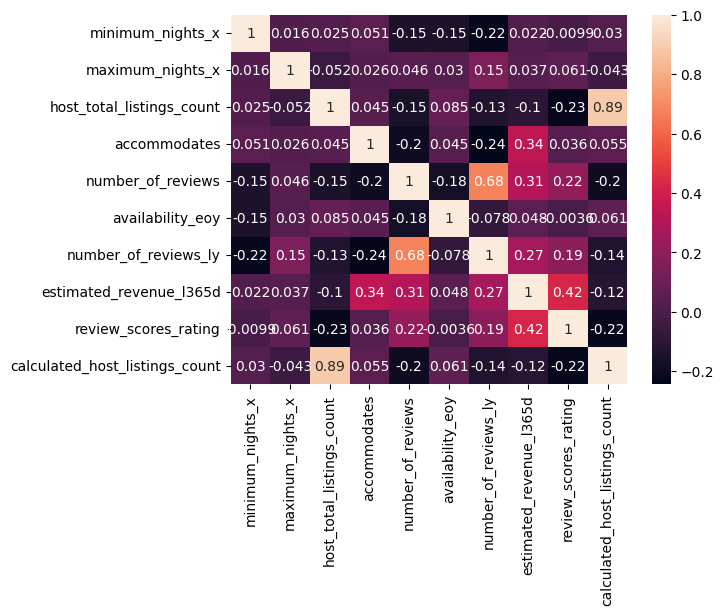

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

to_drop = [
    'reviewer_id',
    'reviews_per_month',
    'listing_id',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'host_id',
    'minimum_minimum_nights',
    'maximum_minimum_nights',
    'minimum_maximum_nights',
    'maximum_maximum_nights',
    'minimum_nights_avg_ntm',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'number_of_reviews_ltm',
    'number_of_reviews_l30d',
    'estimated_occupancy_l365d',
    'id_y',
    'id_x',
    'latitude',
    'longitude',
    'review_scores_location',
    'review_scores_communication',
    'host_listings_count',
    'maximum_nights_avg_ntm',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'beds',
    'review_scores_value',
    'bathrooms',
    'bedrooms',
    'minimum_nights_y',
    'maximum_nights_y'
]

correlation_matrix = numeric_columns.corr().dropna(how='all', axis=1).dropna(how='all', axis=0).drop(index=to_drop, columns=to_drop, errors='ignore')


sns.heatmap(correlation_matrix, annot=True)
plt.show()

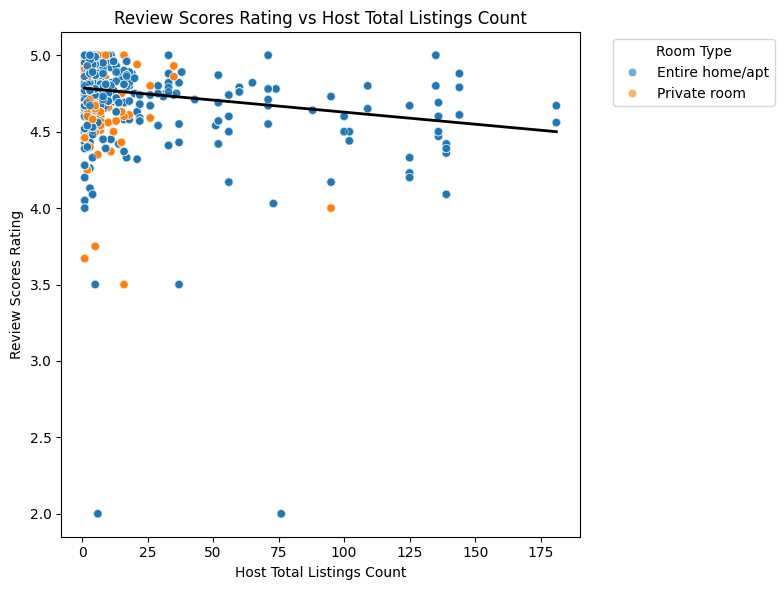

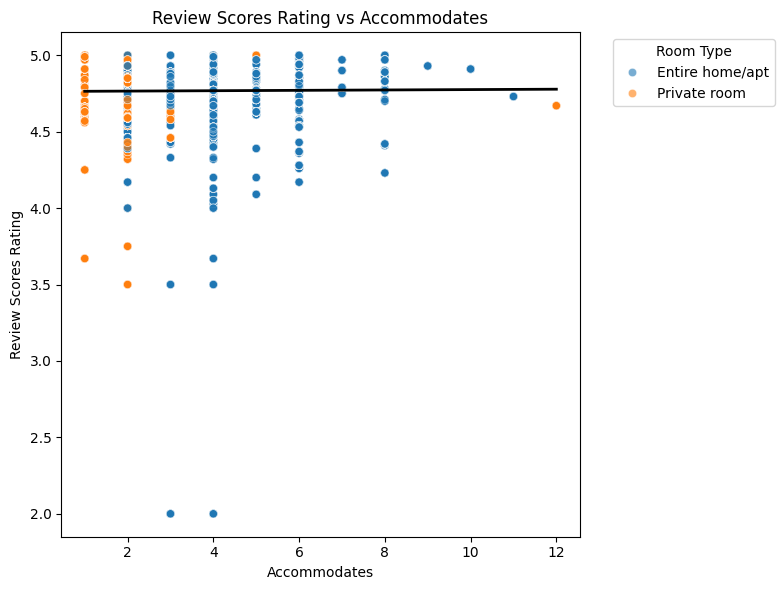

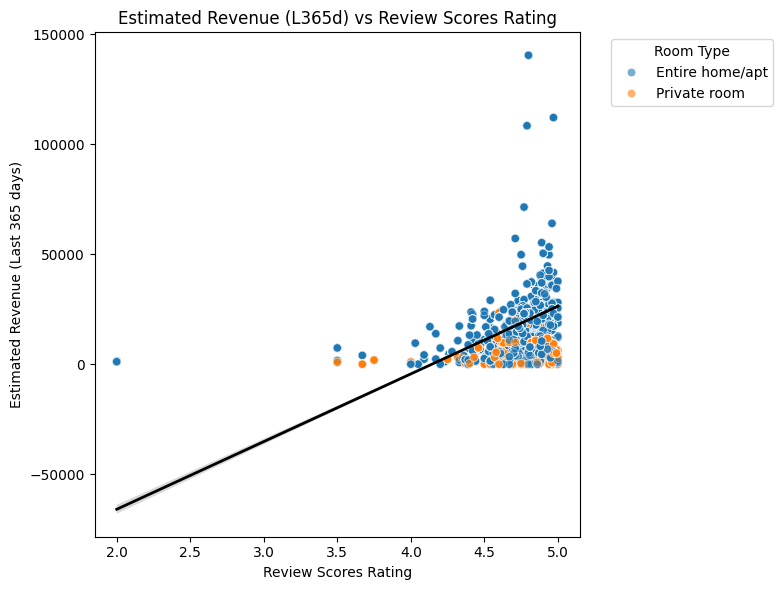

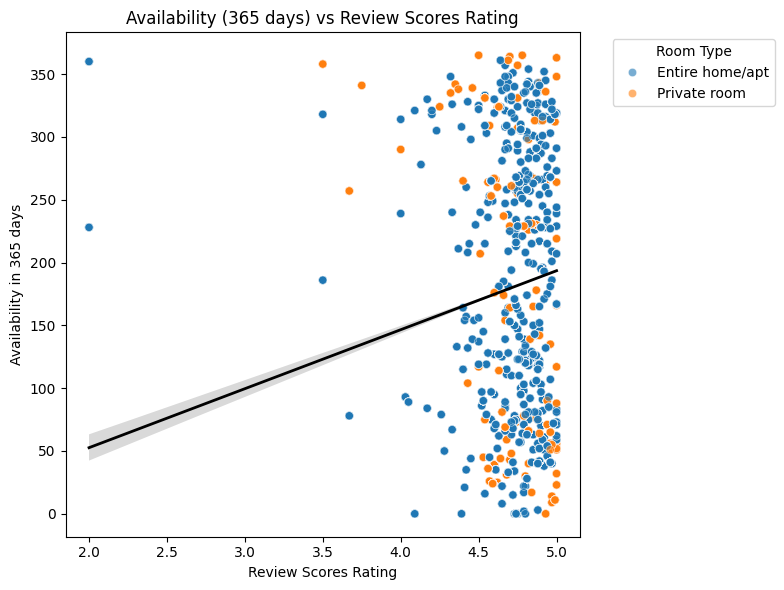

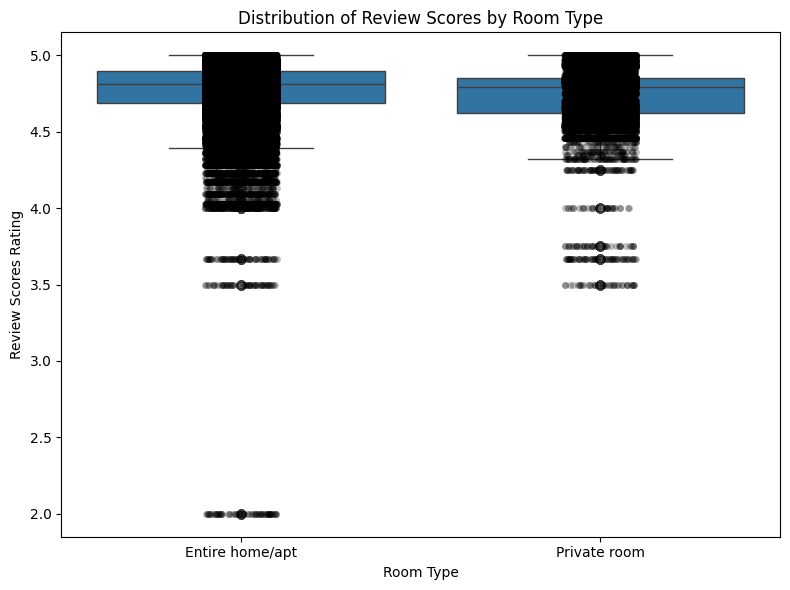

In [30]:
# Scatter plots exploring relationships between key features in df

# Prepare a clean subset to avoid NaNs affecting plots
plot_df = df[
    [
        'review_scores_rating',
        'host_total_listings_count',
        'accommodates',
        'estimated_revenue_l365d',
        'availability_365',
        'room_type'
    ]
].dropna()

# 1) Review score vs host's total listings count
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=plot_df,
    x='host_total_listings_count',
    y='review_scores_rating',
    hue='room_type',
    alpha=0.6
)
sns.regplot(
    data=plot_df,
    x='host_total_listings_count',
    y='review_scores_rating',
    scatter=False,
    color='black',
    line_kws={'lw': 2}
)
plt.title('Review Scores Rating vs Host Total Listings Count')
plt.xlabel('Host Total Listings Count')
plt.ylabel('Review Scores Rating')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2) Review score vs accommodates
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=plot_df,
    x='accommodates',
    y='review_scores_rating',
    hue='room_type',
    alpha=0.6
)
sns.regplot(
    data=plot_df,
    x='accommodates',
    y='review_scores_rating',
    scatter=False,
    color='black',
    line_kws={'lw': 2}
)
plt.title('Review Scores Rating vs Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Review Scores Rating')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3) Estimated revenue vs review score
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=plot_df,
    x='review_scores_rating',
    y='estimated_revenue_l365d',
    hue='room_type',
    alpha=0.6
)
sns.regplot(
    data=plot_df,
    x='review_scores_rating',
    y='estimated_revenue_l365d',
    scatter=False,
    color='black',
    line_kws={'lw': 2}
)
plt.title('Estimated Revenue (L365d) vs Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Estimated Revenue (Last 365 days)')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4) Availability days vs review score
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=plot_df,
    x='review_scores_rating',
    y='availability_365',
    hue='room_type',
    alpha=0.6
)
sns.regplot(
    data=plot_df,
    x='review_scores_rating',
    y='availability_365',
    scatter=False,
    color='black',
    line_kws={'lw': 2}
)
plt.title('Availability (365 days) vs Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Availability in 365 days')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 5) Boxplot of review scores by room type
plt.figure(figsize=(8, 6))
sns.boxplot(data=plot_df, x='room_type', y='review_scores_rating')
sns.stripplot(data=plot_df, x='room_type', y='review_scores_rating', color='black', alpha=0.25)
plt.title('Distribution of Review Scores by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Review Scores Rating')
plt.tight_layout()
plt.show()

### 1. Data Loading & Sampling
**What we did:**
We loaded the three primary datasets (`calendar`, `listings`, `reviews`) and the `neighbourhoods` file. To ensure our initial development pipeline runs quickly and efficiently, we applied a random sample of 10% (`frac=0.1`) to each dataset.

**Why:**
Working with the full dataset during the development phase can be computationally expensive and slow. Sampling allows us to prototype our cleaning and feature engineering steps rapidly. We used a fixed `random_state=42` to ensure reproducibility.

### 2. Data Merging
**What we did:**
We created a unified dataframe `df` by performing an **inner join** across the datasets:
1.  Merged `calendar` with `listings` on `listing_id` = `id`.
2.  Merged the result with `reviews` on `listing_id`.

**Why:**
Our goal is to predict availability based on listing attributes and past reviews. An inner join ensures we only analyze listings that possess complete information across all three sources (availability data, property details, and guest feedback), eliminating incomplete records immediately.

### 3. Correlation Analysis
**What we did:**
We generated a correlation matrix for numerical features but explicitly dropped a large list of columns (e.g., `availability_30`, `host_id`, `latitude`, `review_scores_accuracy`).

**Why:**
*   **Data Leakage:** Columns like `availability_30` or `availability_60` are directly correlated with our target (`availability_365` or specific dates) and would not be available if we were predicting for a future date in a real-world scenario.
*   **Redundancy:** Columns like `minimum_minimum_nights` vs `minimum_nights` often carry duplicate information.
*   **Irrelevance:** IDs (`host_id`, `reviewer_id`) are categorical identifiers, not numerical features, and their mathematical correlation is meaningless.

### 4. Bivariate Analysis (Visualizations)
**What we did:**
We used scatter plots and box plots to explore relationships between `review_scores_rating` and key metrics like revenue, availability, and host size, segmented by `room_type`.

**Key Insights Sought:**
*   **Quality vs. Quantity:** Does a host with many listings (`host_total_listings_count`) suffer from lower review scores due to divided attention?
*   **Price/Revenue vs. Satisfaction:** Do more expensive or higher-revenue properties actually yield better guest satisfaction?
*   **Room Type Impact:** How does the distribution of review scores differ between `Entire home/apt` and `Private room`?

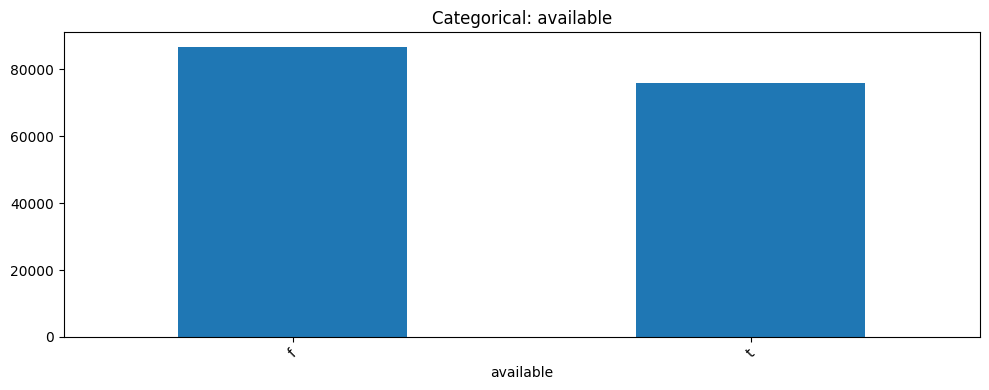

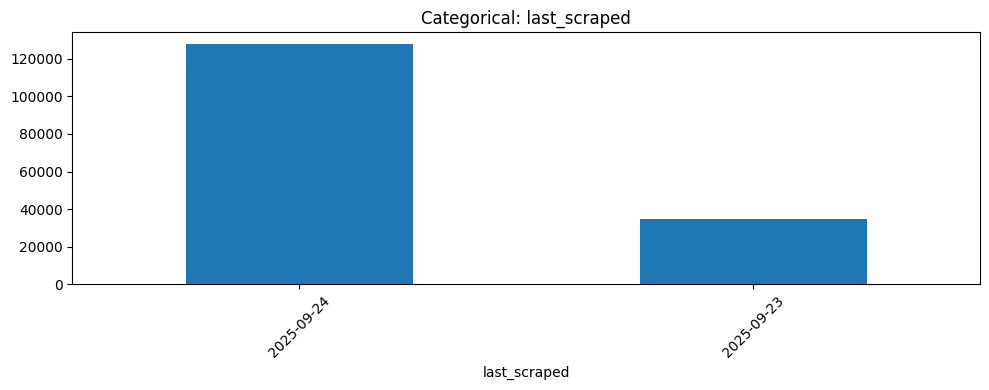

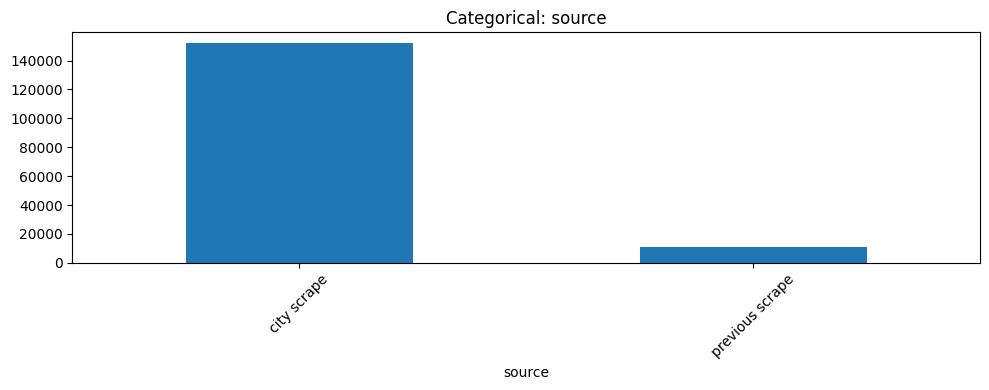

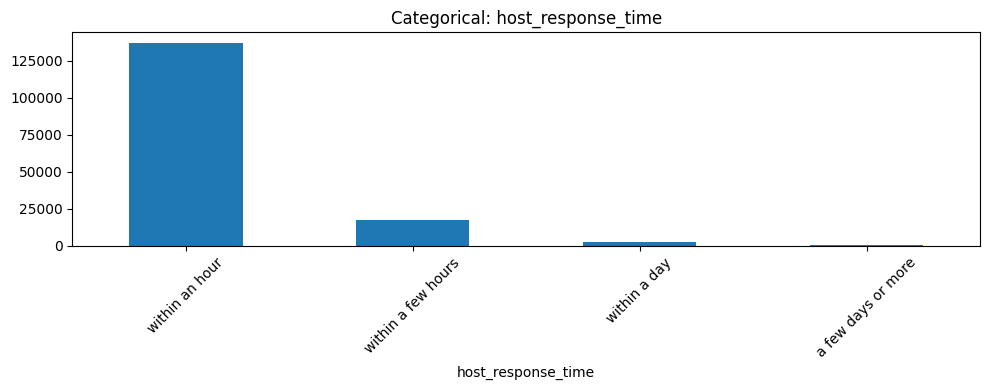

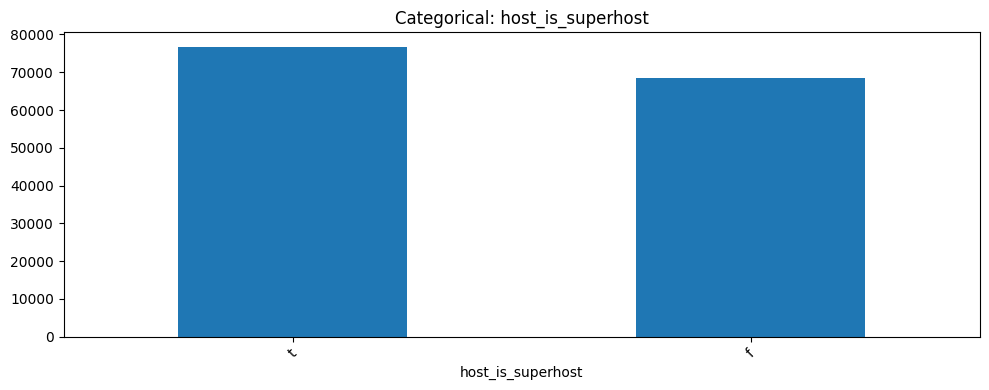

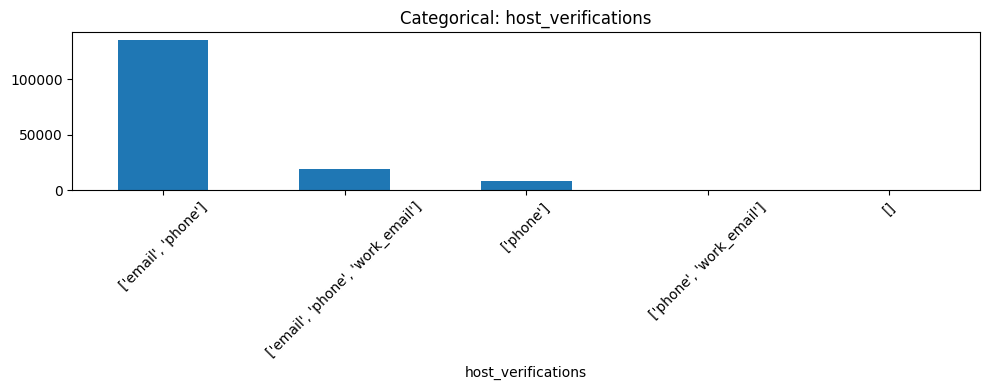

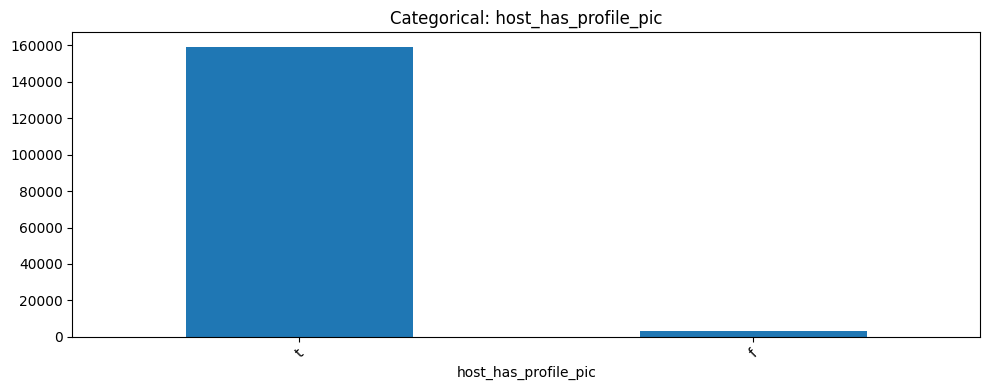

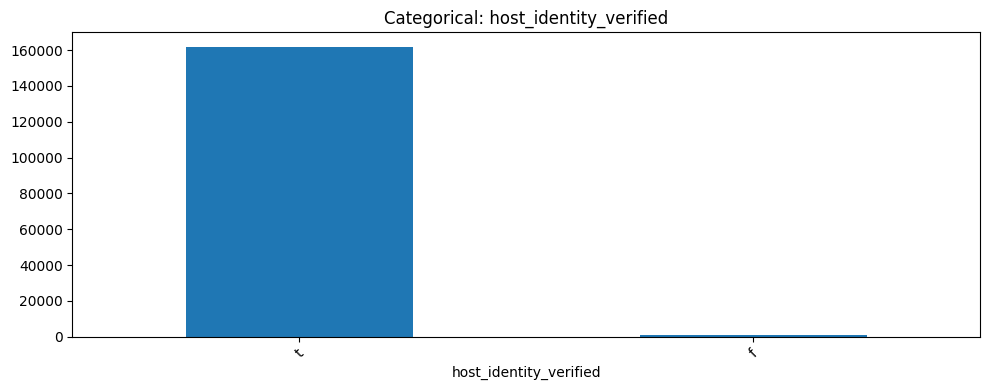

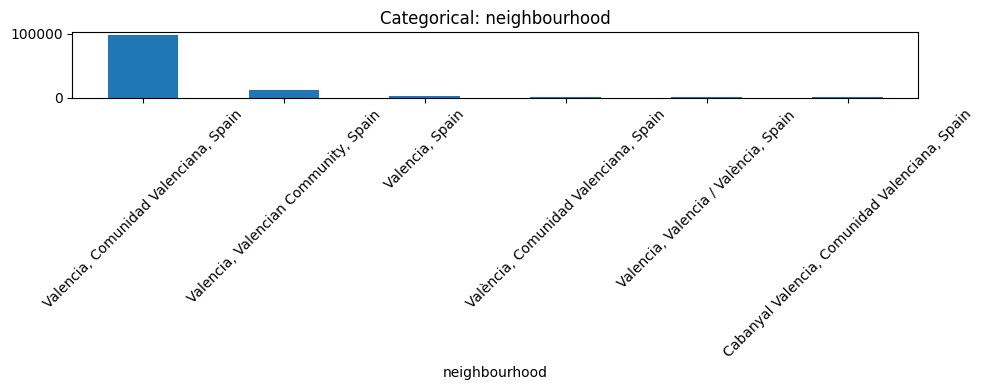

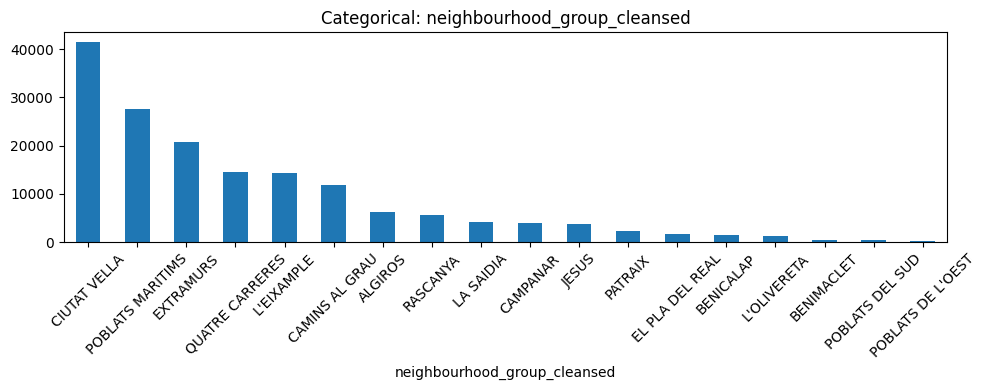

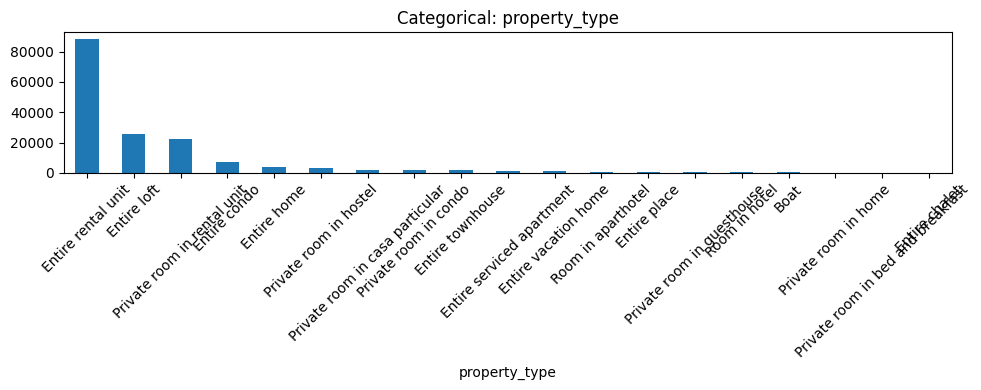

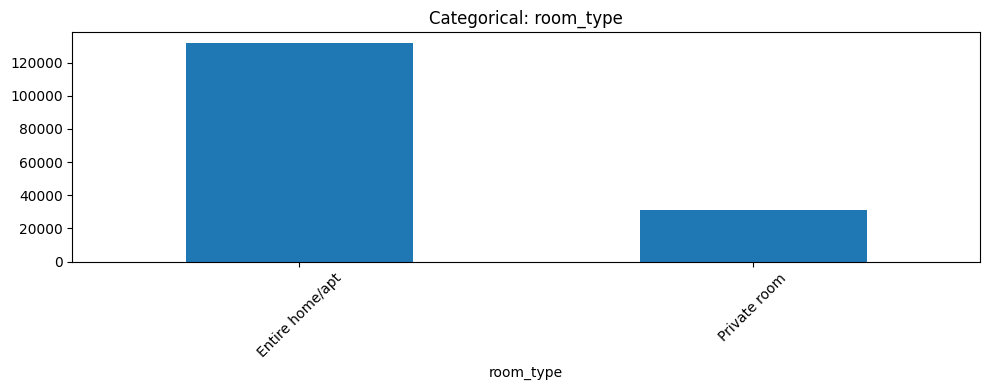

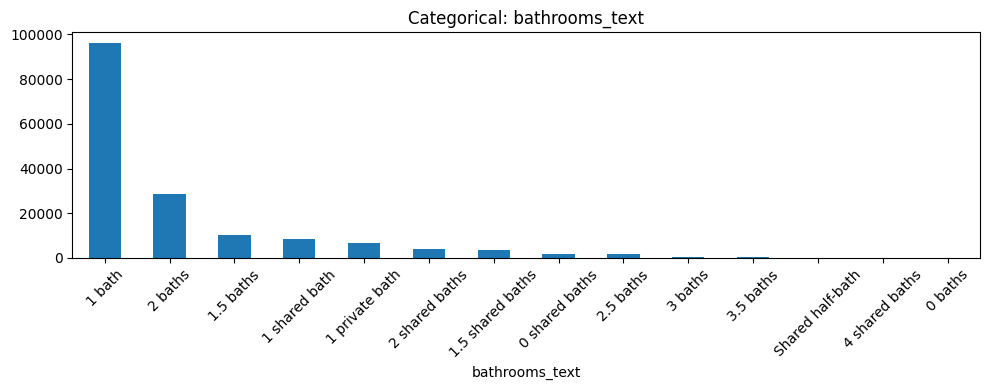

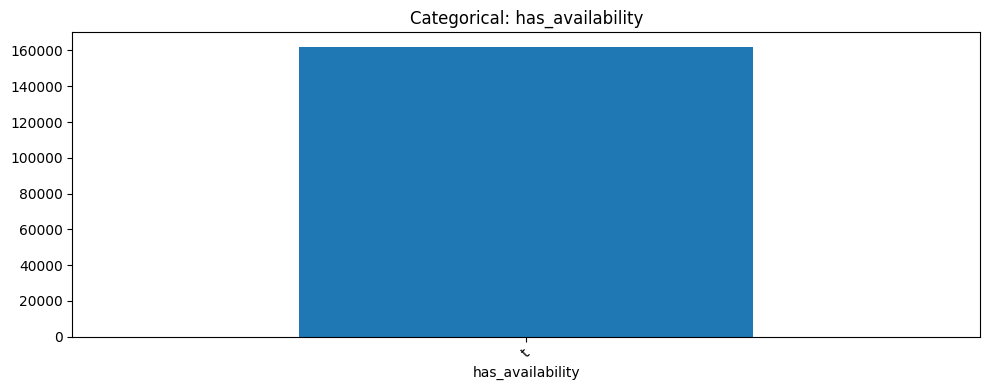

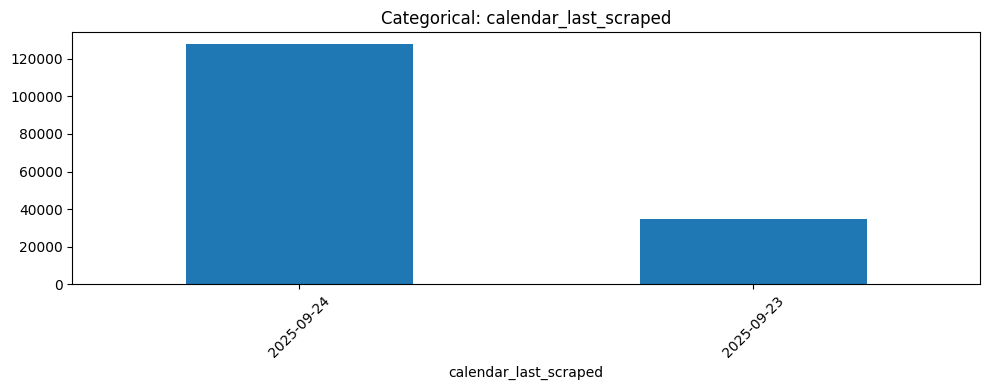

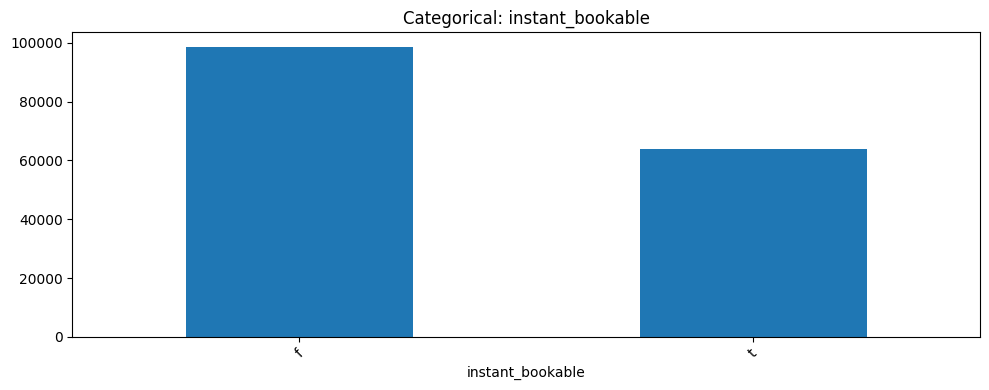

In [31]:
def plot_categorical_features(df, max_unique=20):
    _, categorical_cols = get_feature_types(df)

    for col in categorical_cols:
        if df[col].nunique() <= max_unique:
            plt.figure(figsize=(10, 4))
            df[col].value_counts().plot(kind='bar')
            plt.title(f"Categorical: {col}")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

plot_categorical_features(df)

In [32]:
def clean_df(df):
    df = df.copy()

    # Drop columns we don’t need
    columns_to_drop = ["number_of_reviews_ltm", "reviews_per_month"]
    df = df.drop(columns=columns_to_drop, errors="ignore")

    # Drop columns with >60% missing values
    thresh = len(df) * 0.40
    df = df.dropna(axis=1, thresh=thresh)

    # Fill missing values
    for col in df.columns:
        if df[col].dtype in ["float64", "int64"]:
            df[col] = df[col].fillna(df[col].median())
        else:
            mode_vals = df[col].mode()
            df[col] = df[col].fillna(mode_vals[0] if len(mode_vals) else "unknown")

    # Remove outliers with IQR
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    for col in numeric_cols:
        Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]

    return df


In [33]:
print("\nCleaning merged dataframe...")
df_clean = clean_df(df)
print("Cleaned dataframe shape:", df_clean.shape)



Cleaning merged dataframe...
Cleaned dataframe shape: (39637, 86)


In [34]:


# Build a dict of every CSV in the working directory for easy access
workspace = Path.cwd()
csv_paths = sorted(workspace.glob("*.csv"))
csv_tables = {path.stem: pd.read_csv(path) for path in csv_paths}
{name: df.shape for name, df in csv_tables.items()}

{}

In [35]:


# Apply consistent cleaning rules across all loaded CSV tables
def clean_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    cleaned = df.copy()
    cleaned.columns = (
        cleaned.columns
        .astype(str)
        .str.strip()
        .str.lower()
        .str.replace(r"[^0-9a-z]+", "_", regex=True)
        .str.strip("_")
    )
    cleaned = cleaned.loc[~cleaned.index.duplicated(keep="first")]
    cleaned = cleaned.drop_duplicates()

    empty_cols = [col for col in cleaned.columns if cleaned[col].isna().all()]
    if empty_cols:
        cleaned = cleaned.drop(columns=empty_cols)

    text_cols = cleaned.select_dtypes(include=["object", "string"]).columns
    for col in text_cols:
        cleaned[col] = cleaned[col].astype("string").str.strip()

    bool_map = {"t": True, "f": False, "true": True, "false": False, "yes": True, "no": False}
    for col in cleaned.select_dtypes(include=["string", "object"]).columns:
        lowered = cleaned[col].str.lower().dropna().unique()
        if len(lowered) > 0 and set(lowered).issubset(bool_map.keys()):
            cleaned[col] = cleaned[col].str.lower().map(bool_map)

    datetime_keywords = {"date", "time", "created", "updated", "posted"}
    for col in cleaned.columns:
        if any(keyword in col for keyword in datetime_keywords):
            cleaned[col] = pd.to_datetime(cleaned[col], errors="coerce")

    money_keywords = {"price", "fee", "amount", "cost", "revenue"}
    for col in cleaned.select_dtypes(include=["object", "string"]).columns:
        if any(keyword in col for keyword in money_keywords):
            numeric_series = (
                cleaned[col]
                .astype("string")
                .str.replace(r"[^0-9.+-]", "", regex=True)
            )
            cleaned[col] = pd.to_numeric(numeric_series, errors="coerce")

    for col in cleaned.select_dtypes(include=["object", "string"]).columns:
        numeric_series = pd.to_numeric(cleaned[col], errors="coerce")
        if numeric_series.notna().sum() >= 0.9 * len(cleaned):
            cleaned[col] = numeric_series

    return cleaned

cleaned_tables = {name: clean_dataframe(df) for name, df in csv_tables.items()}
cleaning_report = {
    name: {
        "rows_before": csv_tables[name].shape[0],
        "rows_after": cleaned_tables[name].shape[0],
        "cols_before": csv_tables[name].shape[1],
        "cols_after": cleaned_tables[name].shape[1],
    }
    for name in csv_tables
}
cleaning_report

{}

In [37]:
cols_to_remove = {"reviews_per_month", "number_of_reviews_ltm"}

for name, df in cleaned_tables.items():
    removable = [col for col in cols_to_remove if col in df.columns]
    if removable:
        cleaned_tables[name] = df.drop(columns=removable)

cleaning_report = {
    name: {
        "rows_before": csv_tables[name].shape[0],
        "rows_after": cleaned_tables[name].shape[0],
        "cols_before": csv_tables[name].shape[1],
        "cols_after": cleaned_tables[name].shape[1],
    }
    for name in csv_tables
}
cleaning_report

{}

In [38]:
suggested_log_transforms = {}

def approx_normal(series: pd.Series, skew_thresh: float = 0.5, kurt_thresh: float = 1.0) -> bool:
    """Heuristic check for approximate normality via skewness and kurtosis."""
    skew_val = series.skew()
    kurt_val = series.kurtosis()
    return np.isfinite(skew_val) and np.isfinite(kurt_val) and abs(skew_val) < skew_thresh and abs(kurt_val) < kurt_thresh

# Evaluate log1p transforms for skewed, non-negative numeric columns (diagnostics only)
for name, df in cleaned_tables.items():
    numeric_cols = df.select_dtypes(include=["number"]).columns
    candidate_cols = [
        col
        for col in numeric_cols
        if not df[col].dropna().empty and (df[col].dropna() >= 0).all()
    ]
    if not candidate_cols:
        continue
    print(f"Log1p skew inspection for {name}")
    better_cols = []
    for col in candidate_cols:
        col_data = df[col].dropna()
        skew_before = col_data.skew()
        kurt_before = col_data.kurtosis()
        before_normal = approx_normal(col_data)
        log_data = np.log1p(col_data)
        skew_after = log_data.skew()
        kurt_after = log_data.kurtosis()
        after_normal = approx_normal(log_data)
        print(
            f"{col}: skew before={skew_before:.2f}, kurt before={kurt_before:.2f} | skew log1p={skew_after:.2f}, kurt log1p={kurt_after:.2f}"
        )
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        sns.histplot(col_data, kde=True, ax=axes[0], color="C0", alpha=0.6)
        axes[0].set_title(f"Distribution of {col} (before)")
        axes[0].set_xlabel(col)
        axes[0].set_ylabel("Count")
        sns.histplot(log_data, kde=True, ax=axes[1], color="C1", alpha=0.6)
        axes[1].set_title(f"Distribution of {col} (after log1p)")
        axes[1].set_xlabel(f"log1p({col})")
        axes[1].set_ylabel("Count")
        plt.tight_layout()
        plt.show()
        if after_normal and not before_normal:
            better_cols.append(col)
            print(f"log1p would improve normality for {col}.")
        else:
            print(f"No improvement in normality detected for {col}.")
    if better_cols:
        suggested_log_transforms[name] = better_cols
    print()
suggested_log_transforms

{}

In [39]:
log1p_targets = {"price"}

applied_log_transforms = {}
for name, df in cleaned_tables.items():
    cols_applied = []
    for col in log1p_targets:
        if col in df.columns:
            cleaned_tables[name][col] = np.log1p(df[col])
            cols_applied.append(col)
    if cols_applied:
        applied_log_transforms[name] = cols_applied
applied_log_transforms

{}

In [40]:
encoded_tables = {}
encoding_report = {}

for name, df in cleaned_tables.items():
    table = df.copy()
    categorical_cols = table.select_dtypes(include=["object", "string", "category", "bool"]).columns
    low_cardinality_cols = [col for col in categorical_cols if table[col].nunique(dropna=True) <= 15]
    high_cardinality_cols = sorted(set(categorical_cols) - set(low_cardinality_cols))

    if low_cardinality_cols:
        table = pd.get_dummies(table, columns=low_cardinality_cols, drop_first=False, dummy_na=True)

    freq_maps = {}
    for col in high_cardinality_cols:
        freq = table[col].value_counts(normalize=True, dropna=False)
        table[col + "_freq"] = table[col].map(freq)
        freq_maps[col] = freq
    table = table.drop(columns=high_cardinality_cols)
    encoded_tables[name] = table
    encoding_report[name] = {
        "low_cardinality_one_hot": low_cardinality_cols,
        "high_cardinality_frequency": high_cardinality_cols,
        "final_shape": table.shape,
    }

encoding_report

{}

In [41]:


def haversine_distance(lat1, lon1, lat2, lon2):
    # Compute great-circle distance between two points (kilometers)
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))
    earth_radius_km = 6371
    return earth_radius_km * c

distance_features = {}

for name, df in cleaned_tables.items():
    table = df.copy()
    if {"latitude", "longitude"}.issubset(table.columns):
        center_lat = table["latitude"].median()
        center_lon = table["longitude"].median()
        table["distance_to_centroid_km"] = table.apply(
            lambda row: haversine_distance(
                row["latitude"], row["longitude"], center_lat, center_lon
            )
            if pd.notna(row["latitude"]) and pd.notna(row["longitude"])
            else np.nan,
            axis=1,
        )
        distance_features[name] = {
            "centroid": (center_lat, center_lon),
            "max_distance_km": table["distance_to_centroid_km"].max(),
            "mean_distance_km": table["distance_to_centroid_km"].mean(),
        }
        cleaned_tables[name] = table
    else:
        distance_features[name] = "latitude/longitude not available"

distance_features

{}

In [42]:
for name, df in cleaned_tables.items():
    if "distance_to_centroid_km" not in df.columns:
        continue
    subset = df.dropna(subset=["latitude", "longitude", "distance_to_centroid_km"])
    if subset.empty:
        continue
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(subset["distance_to_centroid_km"], bins=30, kde=True, ax=axes[0], color="C2", alpha=0.7)
    axes[0].set_title(f"Distance to Centroid Distribution: {name}")
    axes[0].set_xlabel("Distance (km)")
    axes[0].set_ylabel("Listings")
    sns.scatterplot(
        data=subset,
        x="longitude",
        y="latitude",
        hue="distance_to_centroid_km",
        palette="viridis",
        ax=axes[1]
    )
    axes[1].set_title(f"Spatial Spread by Distance: {name}")
    axes[1].set_xlabel("Longitude")
    axes[1].set_ylabel("Latitude")
    axes[1].legend(title="Distance (km)", loc="best")
    plt.tight_layout()
    plt.show()

# TF-IDF

## Overview

This pipeline extracts meaningful text features from Airbnb listings using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization combined with additional statistical text features.

## Dataset

- **Input**: 162,541 listing-calendar combinations
- **Text columns processed**: description, name, neighborhood_overview, amenities
- **Output**: 267 features (original + 150 TF-IDF + text statistics)

*Note: more explanations and justifications about all the data processed are provided at the end of the notebook.*

### Functionalities TF-IDF

In [ ]:
def clean_text(text):
    """
    Text cleaning for Airbnb listings
    """
    if pd.isna(text):
        return "unknown"
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text if text else "unknown"


def advanced_preprocess_text(text, remove_stopwords=True, lemmatize=True):
    """
    Text preprocessing with lemmatization and stopword removal
    """
    if not text or text == "" or text == "unknown":
        return "unknown"
    
    tokens = word_tokenize(text)

    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        keep_words = {'near', 'close', 'walk', 'distance', 'private', 'shared', 
                      'entire', 'room', 'apartment', 'house', 'studio', 'unknown'}
        stop_words = stop_words - keep_words
        tokens = [word for word in tokens if word not in stop_words]
    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    tokens = [word for word in tokens if len(word) > 2]

    return ' '.join(tokens) if tokens else "unknown"

def extract_amenities_text(amenities_str):
    """
    Extract and clean amenities from JSON-like string format
    """
    if pd.isna(amenities_str):
        return "unknown"
    text = str(amenities_str)
    text = re.sub(r'[\[\]"{}]', ' ', text)
    text = text.replace(',', ' ')
    cleaned = clean_text(text)
    return cleaned if cleaned != "unknown" else "unknown"


def generate_tfidf_features(df, text_column, n_features=50, 
                           ngram_range=(1, 2), max_df=0.8, min_df=2,
                           prefix='tfidf'):
    """
    Generate TF-IDF features from a text column
    """
    print(f"\n{'='*70}")
    print(f"Generating TF-IDF features for: {text_column}")
    print(f"Parameters: n_features={n_features}, ngram_range={ngram_range}")
    print(f"{'='*70}")
    
    tfidf = TfidfVectorizer(
        max_features=n_features,
        ngram_range=ngram_range,
        max_df=max_df,
        min_df=min_df,
        sublinear_tf=True,
        norm='l2'
    )
    
    tfidf_matrix = tfidf.fit_transform(df[text_column].fillna('unknown'))
    
    feature_names = [f"{prefix}_{name}" for name in tfidf.get_feature_names_out()]
    tfidf_df = pd.DataFrame(
        tfidf_matrix.toarray(),
        columns=feature_names,
        index=df.index
    )
    
    print(f"✓ Generated {tfidf_df.shape[1]} TF-IDF features")
    print(f"✓ Vocabulary size: {len(tfidf.vocabulary_)}")
    
    top_features = tfidf_df.mean().sort_values(ascending=False).head(10)
    print(f"\nTop 10 features by average TF-IDF score:")
    for feat, score in top_features.items():
        print(f"  {feat}: {score:.4f}")
    
    return tfidf_df, tfidf


def create_additional_text_features(df, text_columns):
    """
    Create additional statistical features from text columns
    """
    print(f"\n{'='*70}")
    print("CREATING ADDITIONAL TEXT FEATURES")
    print(f"{'='*70}")
    
    text_features = pd.DataFrame(index=df.index)
    for col in text_columns:
        if col not in df.columns:
            continue
        
        print(f"Processing: {col}")
        text_series = df[col].fillna('unknown')
        
        text_features[f'{col}_word_count'] = text_series.apply(
            lambda x: len(str(x).split()))
        text_features[f'{col}_char_count'] = text_series.apply(
            lambda x: len(str(x)))
        text_features[f'{col}_avg_word_length'] = text_series.apply(
            lambda x: np.mean([len(word) for word in str(x).split()]) if len(str(x).split()) > 0 else 0)
        text_features[f'{col}_uppercase_ratio'] = text_series.apply(
            lambda x: sum(1 for c in str(x) if c.isupper()) / len(str(x)) if len(str(x)) > 0 else 0)
        text_features[f'{col}_exclamation_count'] = text_series.apply(
            lambda x: str(x).count('!'))
        text_features[f'{col}_is_missing'] = df[col].isna().astype(int)
    
    print(f"Created {text_features.shape[1]} additional text features")
    
    return text_features

def analyze_tfidf_importance(tfidf_df, tfidf_vectorizer, top_n=20):
    """
    Analyze and visualize TF-IDF feature importance
    """
    idf_scores = pd.DataFrame({
        'feature': tfidf_vectorizer.get_feature_names_out(),
        'idf_score': tfidf_vectorizer.idf_
    }).sort_values('idf_score', ascending=False)
    
    avg_tfidf = tfidf_df.mean().sort_values(ascending=False)
    doc_freq = (tfidf_df > 0).sum().sort_values(ascending=False)
    
    importance_df = pd.DataFrame({
        'feature': avg_tfidf.index,
        'avg_tfidf': avg_tfidf.values,
        'doc_frequency': [doc_freq.get(feat, 0) for feat in avg_tfidf.index]
    })
    
    print(f"\n{'='*70}")
    print(f"TF-IDF FEATURE IMPORTANCE ANALYSIS")
    print(f"{'='*70}")
    print(f"\nTop {top_n} features by average TF-IDF score:")
    print(importance_df.head(top_n).to_string(index=False))
    
    return importance_df

def process_airbnb_text_features(df, text_columns_config=None):
    """
    Complete pipeline to process text columns and generate TF-IDF features
    """
    print("\n" + "="*70)
    print("AIRBNB TEXT FEATURE ENGINEERING PIPELINE")
    print("="*70)
    
    if text_columns_config is None:
        text_columns_config = {
            'description': {
                'n_features': 25,
                'ngram_range': (1, 2),
                'max_df': 0.7,
                'min_df': 5,
                'prefix': 'desc'
            },
            'name': {
                'n_features': 15,
                'ngram_range': (1, 2),
                'max_df': 0.8,
                'min_df': 3,
                'prefix': 'name'
            },
            'neighborhood_overview': {
                'n_features': 15,
                'ngram_range': (1, 2),
                'max_df': 0.7,
                'min_df': 3,
                'prefix': 'neighborhood'
            },
            'amenities': {
                'n_features': 20,
                'ngram_range': (1, 1),
                'max_df': 0.8,
                'min_df': 5,
                'prefix': 'amenity'
            }
        }
    
    df_processed = df.copy()
    all_tfidf_features = []
    vectorizers = {}
    for col, config in text_columns_config.items():
        if col not in df.columns:
            print(f"\nColumn '{col}' not found in dataset, skipping...")
            continue
        
        print(f"\n{'─'*70}")
        print(f"Processing column: {col}")
        print(f"{'─'*70}")
        print("Step 1/3: Cleaning text...")
        if col == 'amenities':
            df_processed[f'{col}_clean'] = df[col].apply(extract_amenities_text)
        else:
            df_processed[f'{col}_clean'] = df[col].apply(clean_text)
        print("Step 2/3: Preprocessing (tokenization, lemmatization, stopword removal)...")
        df_processed[f'{col}_processed'] = df_processed[f'{col}_clean'].apply(
            lambda x: advanced_preprocess_text(x, remove_stopwords=True, lemmatize=True)
        )
        print("Step 3/3: Generating TF-IDF features...")
        tfidf_features, vectorizer = generate_tfidf_features(
            df_processed,
            f'{col}_processed',
            n_features=config['n_features'],
            ngram_range=config['ngram_range'],
            max_df=config['max_df'],
            min_df=config['min_df'],
            prefix=config['prefix']
        )
        
        all_tfidf_features.append(tfidf_features)
        vectorizers[col] = vectorizer
        analyze_tfidf_importance(tfidf_features, vectorizer, top_n=15)
    if all_tfidf_features:
        print(f"\n{'='*70}")
        print("COMBINING ALL TF-IDF FEATURES")
        print(f"{'='*70}")
        
        tfidf_combined = pd.concat(all_tfidf_features, axis=1)
        df_final = pd.concat([df_processed, tfidf_combined], axis=1)
        
        print(f"✓ Total TF-IDF features created: {tfidf_combined.shape[1]}")
        print(f"✓ Final dataset shape: {df_final.shape}")
        
        return df_final, vectorizers, tfidf_combined
    else:
        print("\n⚠ No text columns were processed")
        return df_processed, {}, pd.DataFrame()



### TF-IDF PLOTTING

In [ ]:
def visualize_tfidf_analysis(tfidf_df, df_original=None, target_column=None):
    """
    Comprehensive visualizations for TF-IDF analysis
    """
    print(f"\n{'='*70}")
    print("GENERATING TF-IDF VISUALIZATIONS")
    print(f"{'='*70}")

    fig1 = create_top_features_plot(tfidf_df, top_n=20)
    fig1.show()
    fig2 = create_tfidf_distribution_plot(tfidf_df)
    fig2.show()
    fig3 = create_sparsity_plot(tfidf_df)
    fig3.show()
    if df_original is not None and target_column is not None and target_column in df_original.columns:
        fig4 = create_correlation_plot(tfidf_df, df_original[target_column])
        fig4.show()


def create_top_features_plot(tfidf_df, top_n=20):
    """Create bar plot of top TF-IDF features"""
    top_features = tfidf_df.mean().sort_values(ascending=False).head(top_n)
    
    fig = go.Figure(data=[
        go.Bar(
            x=top_features.values,
            y=top_features.index,
            orientation='h',
            marker=dict(
                color=top_features.values,
                colorscale='Viridis',
                showscale=True,
                colorbar=dict(title="Avg TF-IDF")
            )
        )
    ])
    
    fig.update_layout(
        title=f'Top {top_n} TF-IDF Features by Average Score',
        xaxis_title='Average TF-IDF Score',
        yaxis_title='Feature',
        height=600,
        showlegend=False,
        template='plotly_white'
    )
    
    return fig


def create_tfidf_distribution_plot(tfidf_df):
    """Create histogram of TF-IDF score distribution"""
    all_values = tfidf_df.values.flatten()
    all_values = all_values[all_values > 0]
    
    fig = go.Figure(data=[
        go.Histogram(
            x=all_values,
            nbinsx=50,
            marker=dict(color='steelblue'),
            opacity=0.7
        )
    ])
    
    fig.update_layout(
        title='Distribution of Non-Zero TF-IDF Scores',
        xaxis_title='TF-IDF Score',
        yaxis_title='Frequency',
        height=400,
        template='plotly_white',
        showlegend=False
    )
    
    return fig


def create_sparsity_plot(tfidf_df):
    """Analyze feature sparsity"""
    sparsity = ((tfidf_df > 0).sum() / len(tfidf_df) * 100).sort_values(ascending=False).head(30)
    
    fig = go.Figure(data=[
        go.Bar(
            x=sparsity.index,
            y=sparsity.values,
            marker=dict(color='coral')
        )
    ])
    
    fig.update_layout(
        title='Feature Density (% of documents containing each feature)',
        xaxis_title='Feature',
        yaxis_title='Document Percentage',
        height=500,
        template='plotly_white',
        showlegend=False,
        xaxis=dict(tickangle=-45)
    )
    
    return fig


def create_correlation_plot(tfidf_df, target):
    """Create correlation plot with target variable"""
    correlations = pd.DataFrame({
        'feature': tfidf_df.columns,
        'correlation': [tfidf_df[col].corr(target) for col in tfidf_df.columns]
    }).dropna()
    top_pos = correlations.nlargest(15, 'correlation')
    top_neg = correlations.nsmallest(15, 'correlation')
    top_corr = pd.concat([top_pos, top_neg]).sort_values('correlation')
    
    fig = go.Figure(data=[
        go.Bar(
            x=top_corr['correlation'],
            y=top_corr['feature'],
            orientation='h',
            marker=dict(
                color=top_corr['correlation'],
                colorscale='RdBu',
                showscale=True,
                colorbar=dict(title="Correlation")
            )
        )
    ])
    
    fig.update_layout(
        title='TF-IDF Feature Correlation with Target Variable',
        xaxis_title='Correlation Coefficient',
        yaxis_title='Feature',
        height=600,
        template='plotly_white',
        showlegend=False
    )
    
    return fig

### TF-IDF EXECUTION

In [ ]:
def main_tfidf_pipeline(df):
    """
    Main TF-IDF pipeline for Airbnb hackathon
    """
    print("\n" + "="*70)
    print("STARTING COMPLETE TF-IDF PIPELINE FOR AIRBNB DATA")
    print("="*70)
    
    df_with_tfidf, vectorizers, tfidf_features = process_airbnb_text_features(df)
    
    text_columns = ['description', 'name', 'neighborhood_overview']
    additional_features = create_additional_text_features(
        df,
        [col for col in text_columns if col in df.columns]
    )

    df_final = pd.concat([df_with_tfidf, additional_features], axis=1)

    if not tfidf_features.empty:
        visualize_tfidf_analysis(tfidf_features)
    
    print(f"\n{'='*70}")
    print("PIPELINE COMPLETE")
    print(f"{'='*70}")
    print(f"✓ Final dataset shape: {df_final.shape}")
    print(f"✓ TF-IDF features: {tfidf_features.shape[1]}")
    print(f"✓ Additional text features: {additional_features.shape[1]}")
    print(f"✓ Total new features: {tfidf_features.shape[1] + additional_features.shape[1]}")
    
    return df_final, vectorizers

main_tfidf_pipeline(df)

### Last step before ml

In [ ]:
print("\nApplying OneHotEncoder + StandardScaler (ML preprocessing)...")

numeric_cols, categorical_cols = get_feature_types(df_clean)

preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_cols),
        ("scale", StandardScaler(), numeric_cols)
    ],
    remainder="drop"
)

df_processed = preprocessor.fit_transform(df_clean)

# Build feature name list
feature_names = (
    list(preprocessor.named_transformers_["onehot"]
         .get_feature_names_out(categorical_cols))
    +
    numeric_cols
)

# Convert to DataFrame
df_processed = pd.DataFrame(df_processed, columns=feature_names)

df_processed.to_csv("merged_encoded_scaled_ml_ready.csv", index=False)

print("\n ML-ready encoded + scaled dataset saved as: merged_encoded_scaled_ml_ready.csv")
print("Pipeline completed successfully!")
